# <font color='Blue'>Machine Learning - Ensemble Methods - Extreme Gradient Boosting</font>

## <font color='Blue'>Reference</font>

https://www.datacamp.com/community/tutorials/xgboost-in-python

## <font color='Blue'>Importing Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from confusion_matrix import make_confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

## <font color='Blue'>1.0 Loading Data</font>

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data['PRICE'] = boston.target

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## <font color='Blue'>1.1 Splitting Features</font>

In [12]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

## <font color='Blue'>1.2 Splitting data into train and test</font>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## <font color='Blue'>1.3 Model Building</font>

<b> XGB Hyperparameters </b>

    learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
    max_depth: determines how deeply each tree is allowed to grow during any boosting round.
    subsample: percentage of samples used per tree. Low value can lead to underfitting.
    colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
    n_estimators: number of trees you want to build.

<b> objective: determines the loss function to be used like  </b>
    
    reg:squarederror for regression problems, 
    reg:logistic for classification problems with only decision, 
    binary:logistic for classification problems with probability.
      
<b> XGB Regularization parameters </b>
    
    gamma: controls whether a given node will split based on the expected reduction in loss after the split. 
    A higher value leads to fewer splits. Supported only for tree-based learners.
    alpha: L1 regularization on leaf weights. A large value leads to more regularization.
    lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

### <font color='Blue'>Instantiating XGBoost</font>

In [14]:
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

### <font color='Blue'>Fitting the model</font>

In [15]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

## <font color='Blue'>1.4 Predicted Values and Performance</font>

In [16]:
preds

array([10.670782 , 17.886362 , 23.993221 , 10.971137 , 20.656567 ,
       17.063112 , 17.413216 ,  7.1758337, 11.684821 , 17.894796 ,
       18.901701 , 14.567413 , 10.806006 , 15.261372 , 12.66772  ,
       14.075861 , 13.288725 , 24.107811 , 13.454856 , 11.560353 ,
       11.525483 , 11.551982 , 19.228527 , 23.993221 , 20.524649 ,
       13.448225 , 10.661165 , 15.404765 , 16.191902 , 13.140589 ,
       14.916252 , 21.076527 ,  8.176096 , 14.827184 , 15.909969 ,
       21.041925 , 16.428032 ,  9.314631 , 12.319548 , 23.573265 ,
       18.292862 , 13.454856 ,  9.351014 , 22.248753 , 13.000366 ,
       16.475197 , 14.159811 , 15.230242 , 12.319548 , 11.772567 ,
       21.076527 , 16.024069 , 14.159811 ,  8.882479 , 13.588928 ,
       10.661165 , 11.776985 ,  7.1758337, 19.659273 ,  9.299877 ,
       12.806547 , 13.811639 , 11.339502 , 13.683961 , 14.075861 ,
       16.993258 , 16.206121 , 12.02784  , 15.3576   , 18.292862 ,
       13.223848 , 16.329927 , 12.808572 , 16.679268 , 11.4762

### <font color='Blue'>Getting RMSE Value</font>

In [17]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


## <font color='Blue'>1.5 k-fold Validation</font>

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original 
training dataset are used for both training as well as validation. Also, each entry is used for validation just once. 

XGBoost supports k-fold cross validation via the cv() method. 
All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

### <font color='Blue'>Executing k-fold validation</font>

Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [18]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [19]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.746326,0.083844,21.758668,0.269160
1,19.798198,0.045842,19.838189,0.318785
2,18.037712,0.092316,18.101951,0.275421
3,16.465751,0.076299,16.537091,0.255891
4,15.017911,0.097691,15.089183,0.259381
5,13.738715,0.095507,13.852248,0.238655
6,12.576883,0.116217,12.692435,0.253200
7,11.551450,0.128272,11.690100,0.272291
8,10.686616,0.142434,10.845154,0.293558
9,9.845198,0.114042,10.016906,0.309566


## <font color='Blue'>1.6 Finding Feature Importance</font>

In [20]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=15)

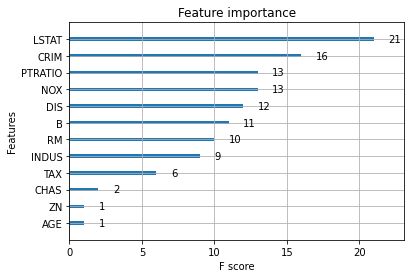

In [21]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### <font color='Blue'>Displaying the XGB Tree</font>

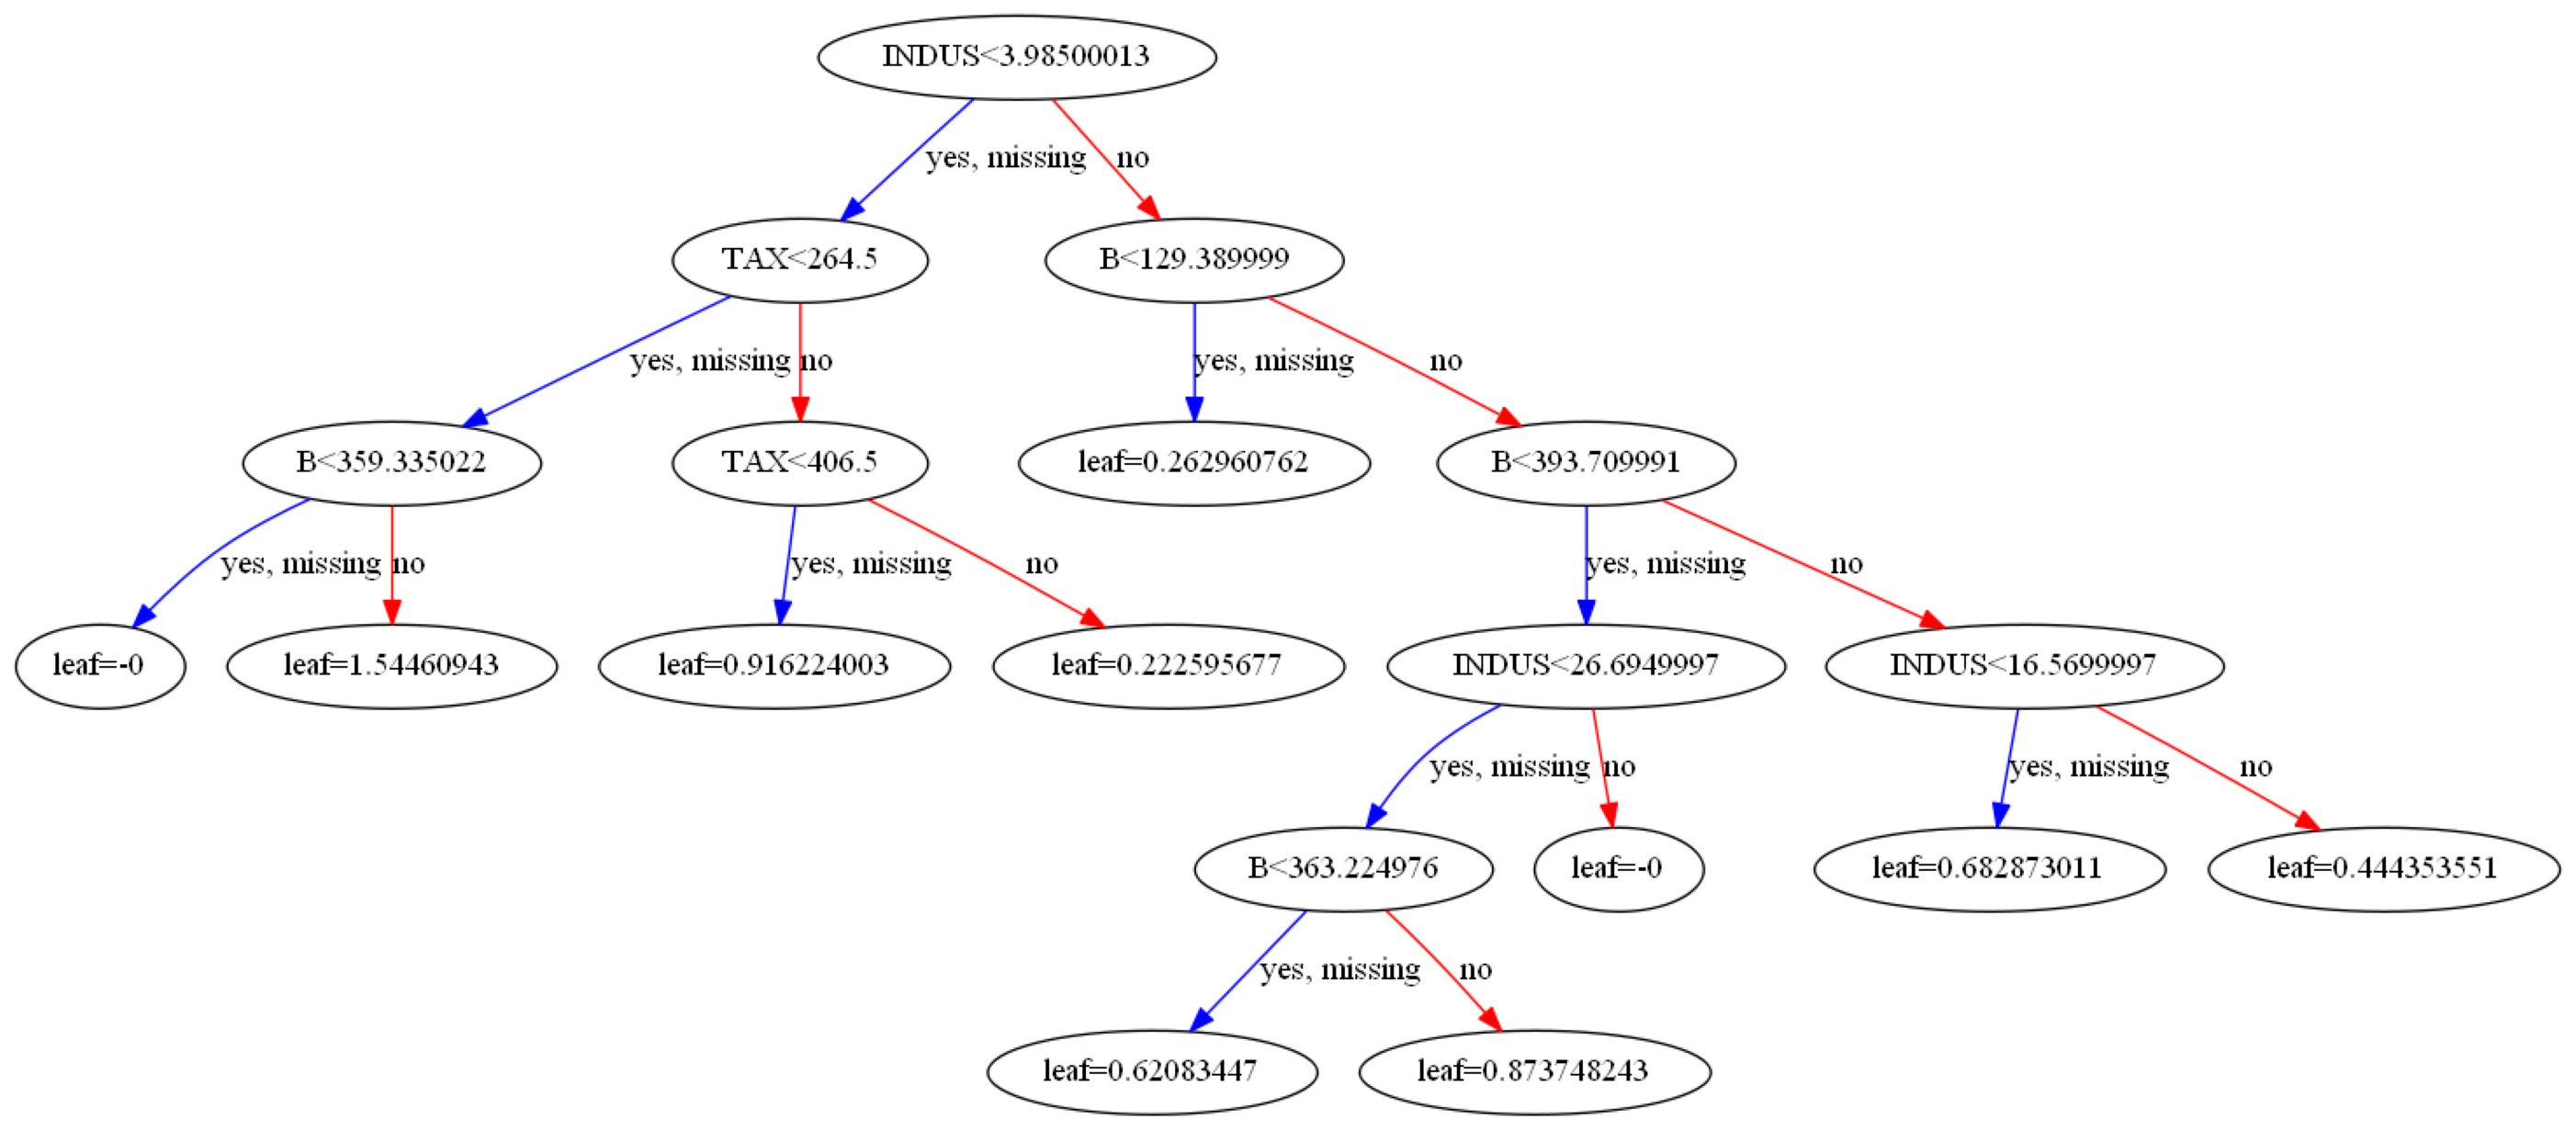

In [23]:
# Run as administrator if the command does not work: conda install -c conda-forge python-graphviz

xgb.plot_tree(xg_reg,num_trees=10)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

## <font color='Blue'>1.7 Parameter Tuning</font>

### <font color='Blue'>1.7.1 Define Parameter Space</font>

In [24]:
param_grid = {
             'max_depth':range(3,10,2),
             'min_child_weight':range(1,6,2),
             'learning_rate':[0.1, 0.2, 0.3],
             'n_estimators':range(5,19,3),
             'subsample':[0.1,0.2,0.3]
             }
param_grid
print(4*3*3*5*3)

540


### <font color='Blue'>1.7.2 Define Grid Search</font>

In [25]:
gsearch    = GridSearchCV(estimator = 
                          XGBRegressor( objective ='reg:squarederror', colsample_bytree = 0.3, 
                                            learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10,
                                            subsample = 0.5), 
                          param_grid = param_grid, cv=5,verbose=1,n_jobs=4)

### <font color='Blue'>1.7.3 Execute Grid Search</font>

In [26]:
gsearch.fit(X_train,y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(alpha=10, base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=10, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.5,
                                    tree_method=None, validate_p

### <font color='Blue'>1.7.4 Indentifying best parameter and score</font>

In [27]:
gsearch.best_params_

{'learning_rate': 0.3,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 17,
 'subsample': 0.3}

In [28]:
# Get the best score
gsearch.best_score_

0.7603902405193684

### <font color='Blue'>1.7.5 Print CV Results</font>

In [29]:
gsearch.cv_results_

{'mean_fit_time': array([0.04112859, 0.01438484, 0.01121364, 0.01222854, 0.015242  ,
        0.01681423, 0.01505847, 0.01686831, 0.01746011, 0.01467366,
        0.01773844, 0.01744604, 0.01887069, 0.0151866 , 0.02392964,
        0.01242795, 0.01263599, 0.00996904, 0.01670756, 0.00948119,
        0.0170681 , 0.01166959, 0.01354547, 0.01255322, 0.01923895,
        0.01012917, 0.01562824, 0.01629663, 0.02108068, 0.0199091 ,
        0.01070156, 0.00989466, 0.00781889, 0.01104813, 0.00942717,
        0.01166143, 0.01191459, 0.01849051, 0.01330075, 0.01383629,
        0.01908507, 0.01792498, 0.01496592, 0.01717548, 0.02014737,
        0.00861197, 0.01109691, 0.00809827, 0.01056433, 0.01046886,
        0.01310253, 0.0112226 , 0.0140799 , 0.019098  , 0.01812248,
        0.01728568, 0.01962452, 0.0221961 , 0.02489586, 0.01936355,
        0.00824609, 0.00695839, 0.00773335, 0.0107491 , 0.00962853,
        0.01146202, 0.01169233, 0.01046438, 0.00977182, 0.0129384 ,
        0.01697083, 0.01778464,